In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from onboard_detector_processor import oboardDetectorProcessor
from onboard_prototype_utils import load_data, plot
import torch
from matplotlib.patches import Rectangle
from datasets.data_utils import get_data_loader
import matplotlib.pyplot as plt

In [3]:
data = load_data(r"C:\Users\meoni\Documents\ESA\Projects\END2END\onboard_prototype\my_dir")

In [10]:
detector_number="9"
data_dn = data["Etna_00"][detector_number]
onboard_processor=oboardDetectorProcessor("S2B", detector_number)
onboard_processor.load_model(r"C:\Users\meoni\Documents\ESA\Projects\END2END\MSMatch\checkpoint\thraws_swir_train\FixMatch_archefficientnet-lite0_batch8_confidence0.95_lr0.03_uratio4_wd0.00075_wu1.0_seed0_numlabels800_optSGD\model_best.pth")
onboard_processor.eval()
y_list=[]
x_coreg_list=[]

data_range=[list(data_dn.keys())[::-1] if not(int(detector_number) % 2) else list(data_dn.keys())]
for granule_number in data_range[0]:
    y,x_coreg=onboard_processor(data_dn[granule_number])
    y_list.append(y)
    x_coreg_list.append(x_coreg)

Using not pretrained model efficientnet-lite0 ...


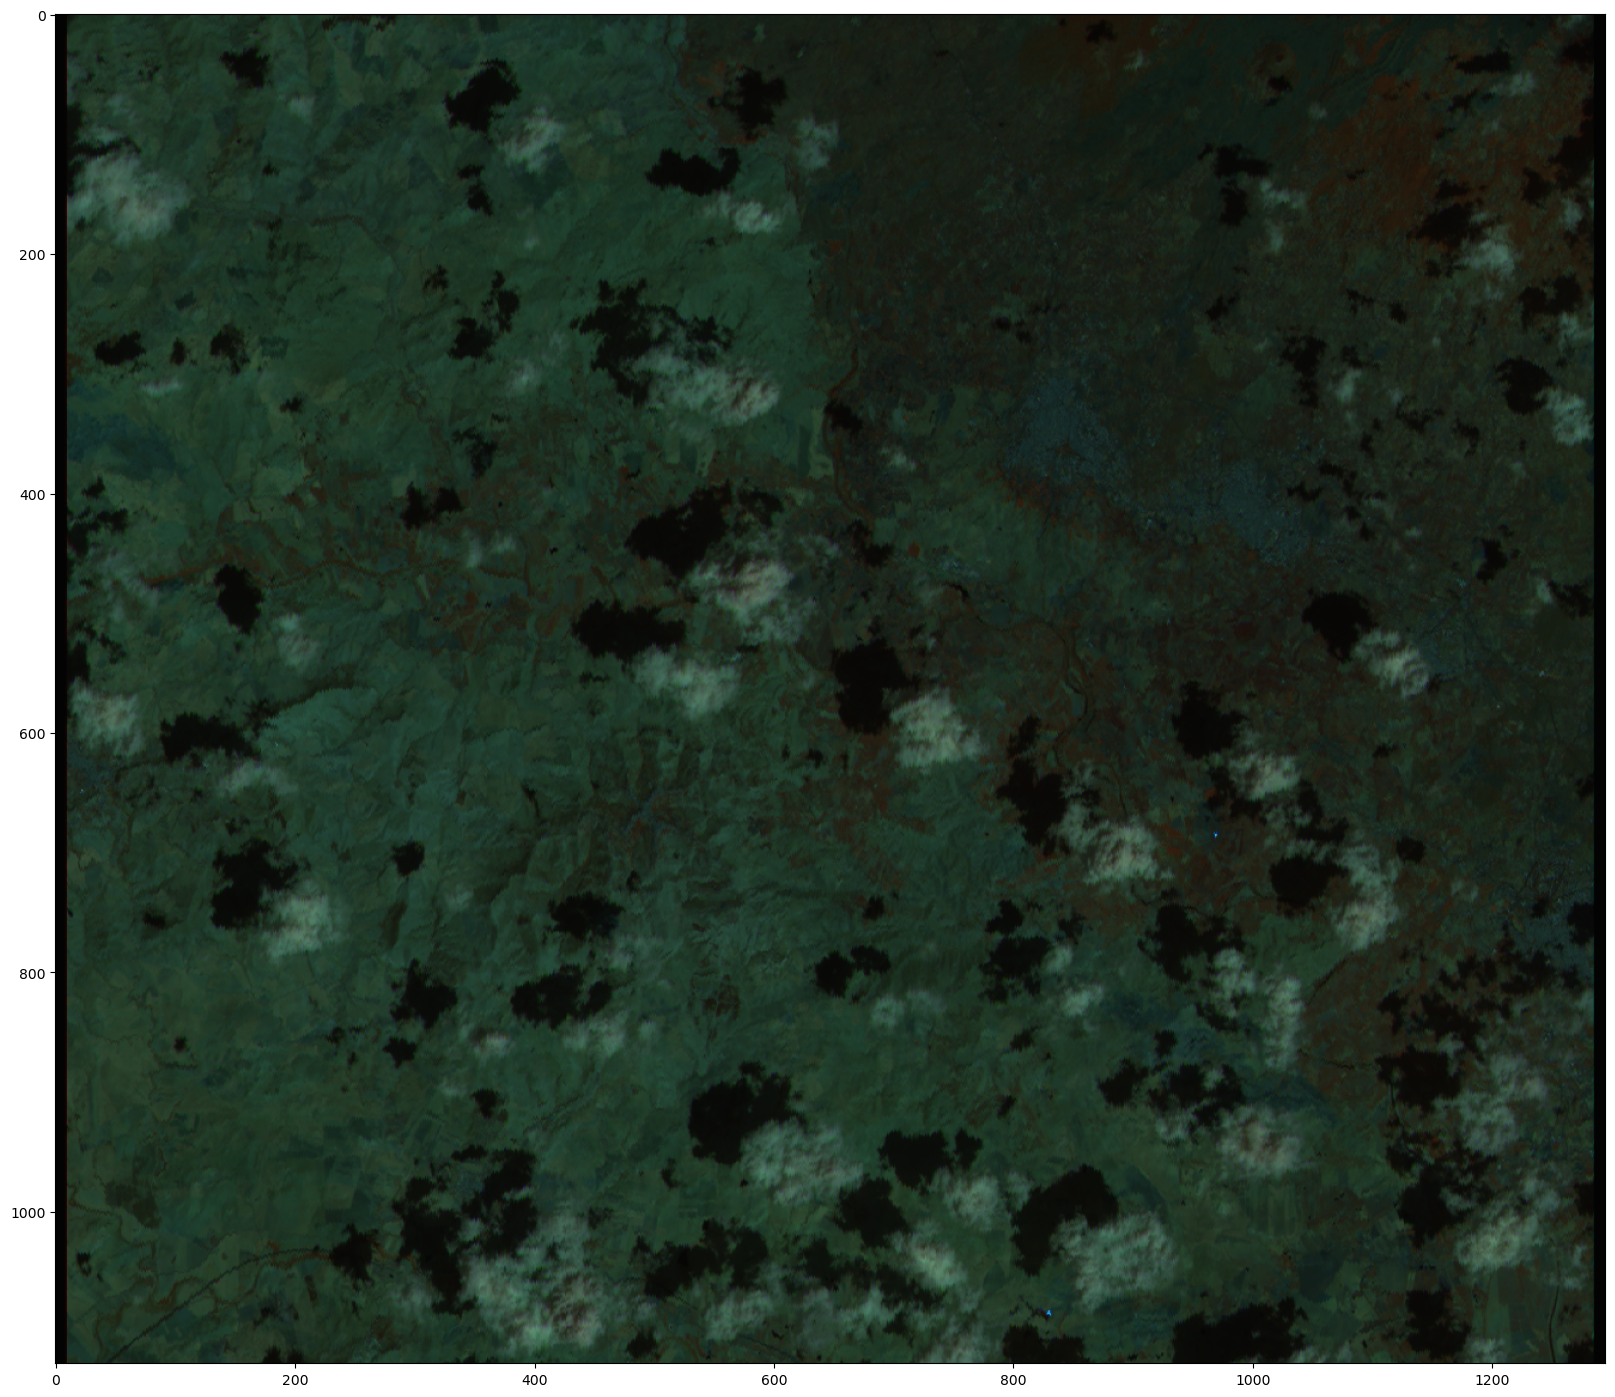

In [16]:
plt.figure(figsize=(20,20))
plot(x_coreg_list[2], x_max=255)

In [33]:
from torch.nn.functional import pad
x_coreg=x_coreg_list[2]
n_v, n_h=int(x_coreg.shape[1] / 256), int(x_coreg.shape[2] / 256)
x_coreg_pad=pad(x_coreg, (0, (256 - (x_coreg.shape[2] - n_h * 256)) % 256, 0, (256 - (x_coreg.shape[1] - n_v * 256) % 256)), "replicate")
for n_h, h in enumerate(range(0, x_coreg_pad.shape[2], 256)):
    for n_v, v in enumerate(range(0, x_coreg_pad.shape[1], 256)):
        x_in=x_coreg_pad[:,v:v+256,h:h+256]
        print(h, v)
    if n_h == 2:
        break

0 0
0 256
0 512
0 768
0 1024
256 0
256 256
256 512
256 768
256 1024
512 0
512 256
512 512
512 768
512 1024


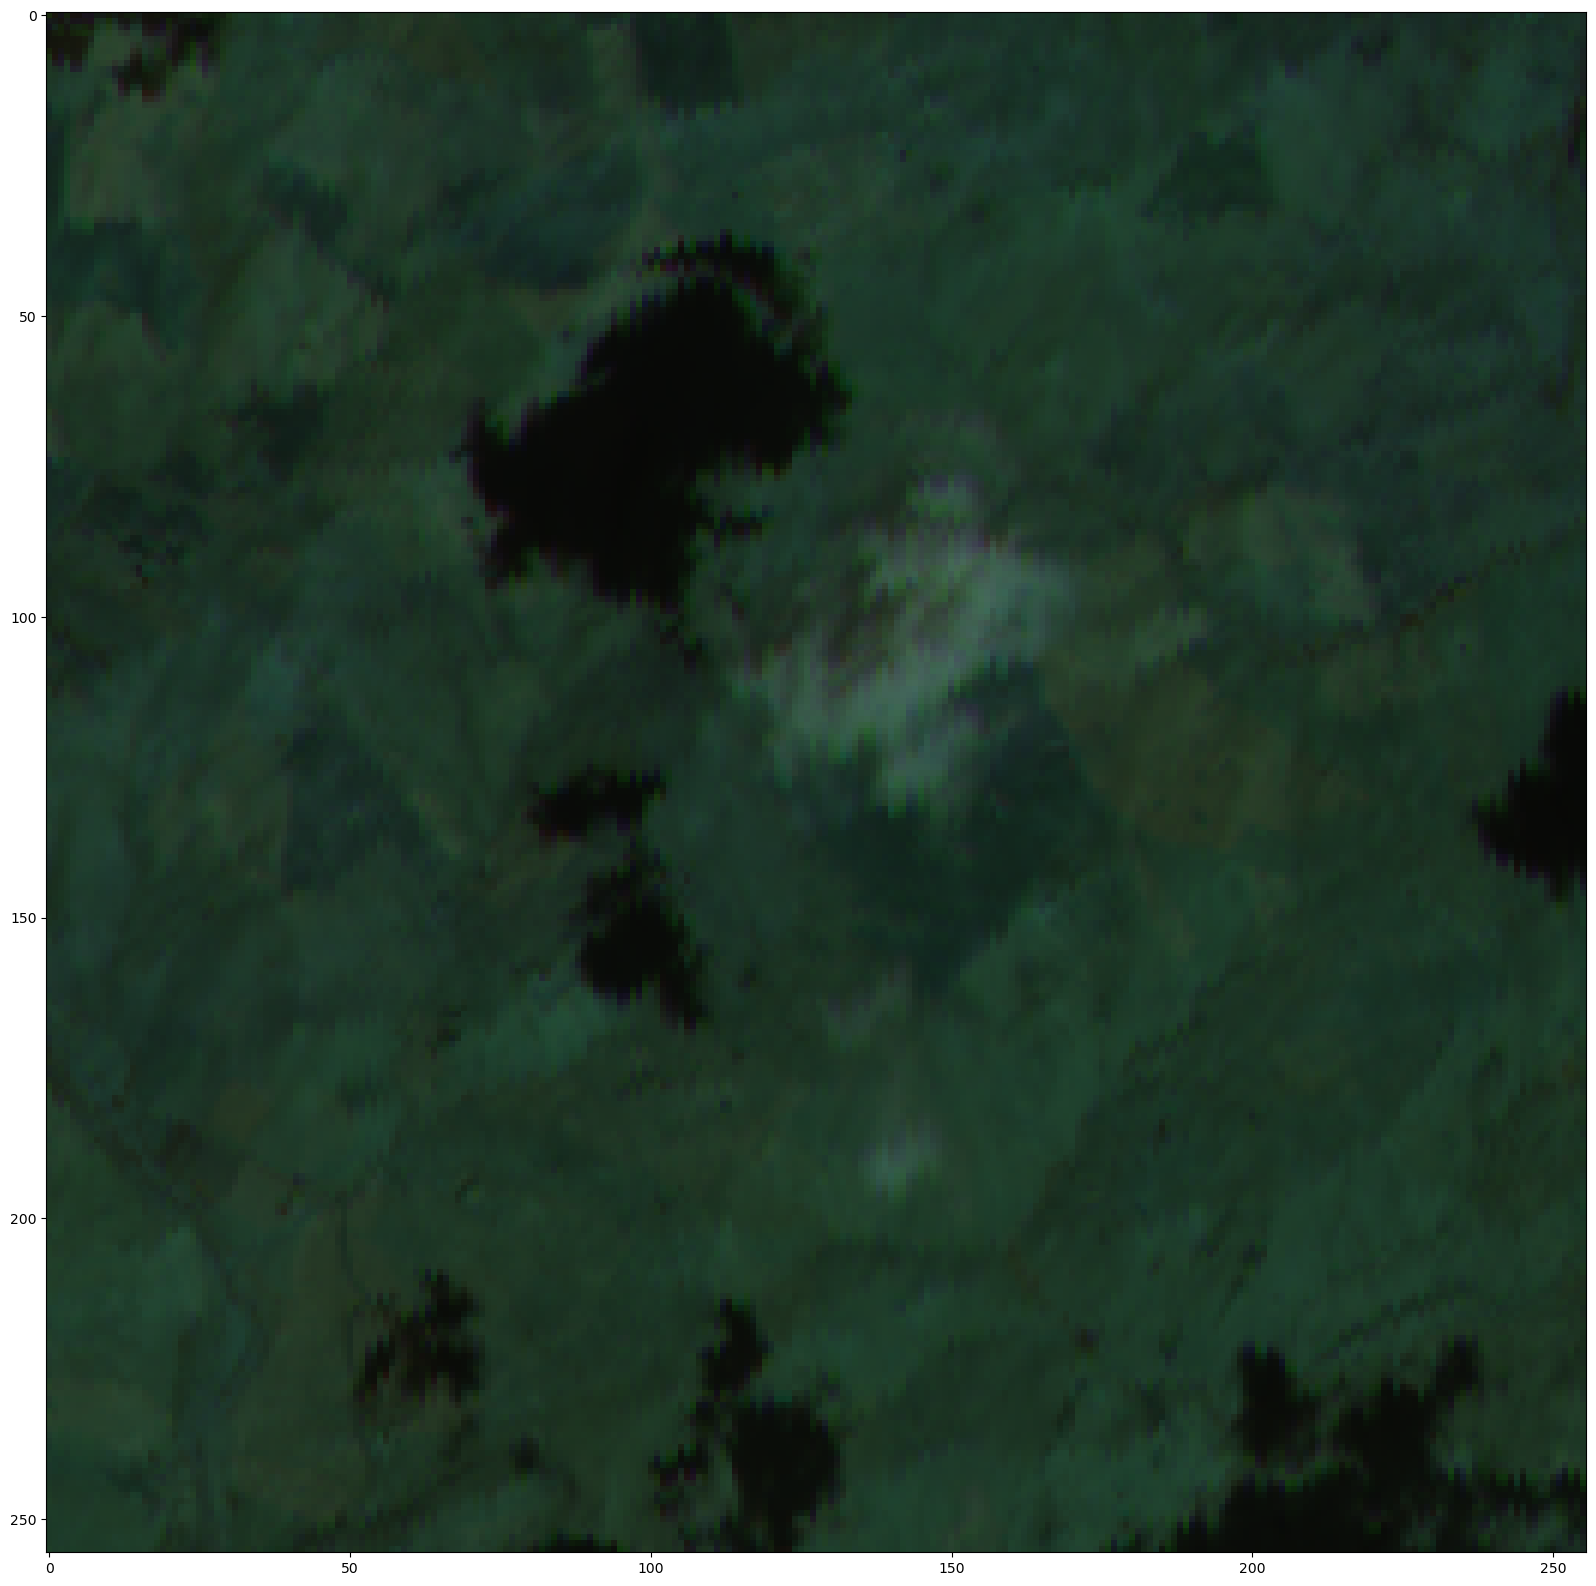

In [35]:
plt.figure(figsize=(20,20))
plot(x_coreg_pad[:,0:+256,256:256+256], x_max=255)

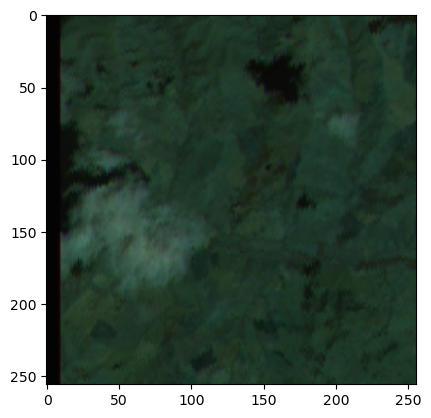

In [30]:
plot(x_in, x_max=255)

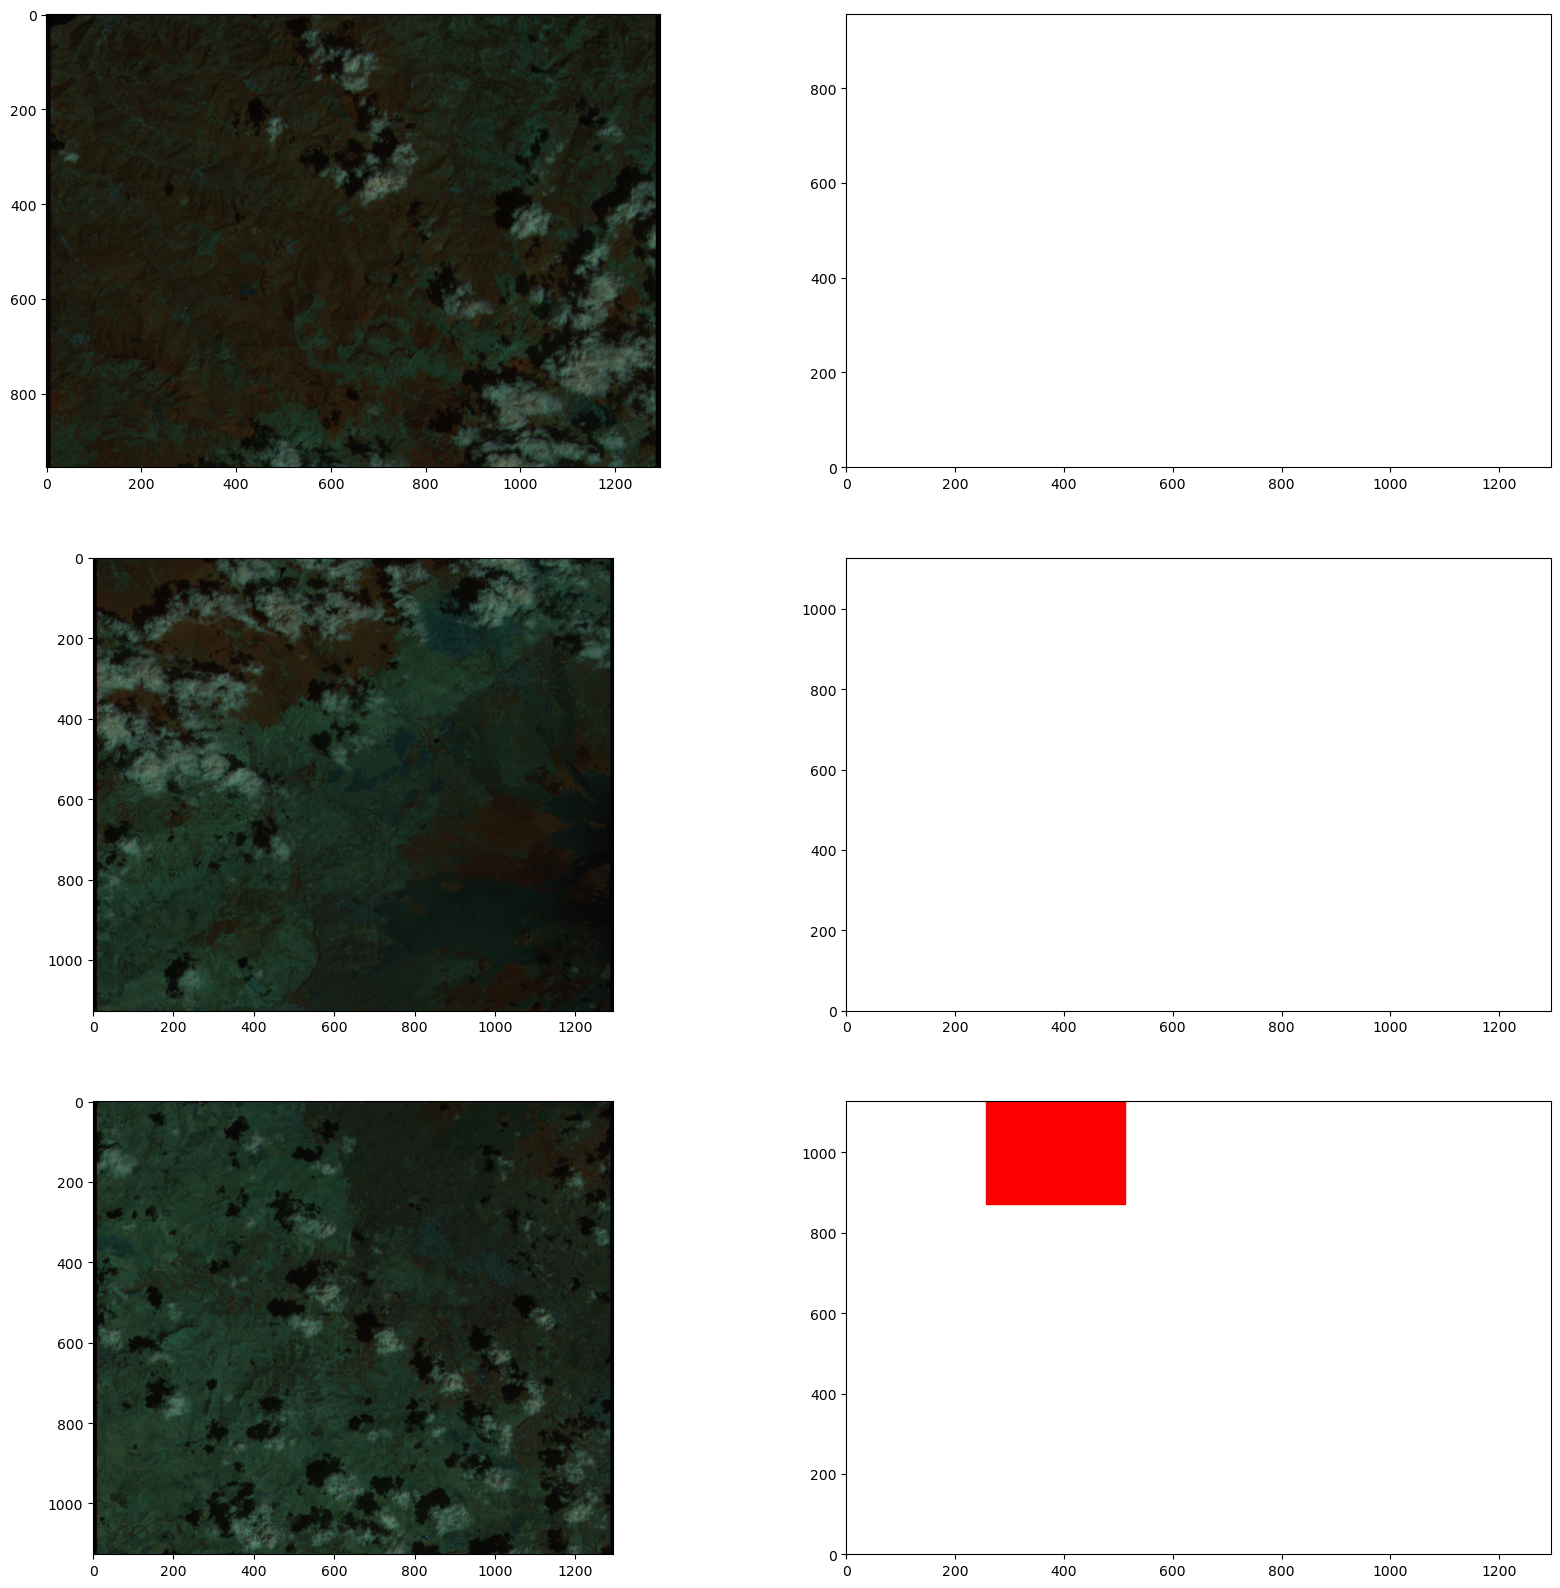

In [11]:
fig, ax=plt.subplots(3,2, figsize=(20,20))

for n in range(3):
    x=x_coreg_list[n]
    y=y_list[n]
    plot(x,x_max=255, ax=ax[n,0])

    #x_map=torch.zeros([x.shape[1], x.shape[2], 3])
    ax[n,1].set_xlim(0, x.shape[2])
    ax[n,1].set_ylim(0, x.shape[1])
    patch_list=[]
    for h in range(y.shape[1]):
        for v in range(y.shape[0]):
            if y[v,h] == 0:
                patch_list.append(Rectangle((h * 256,x.shape[1] - v * 256), 256, -256, color='red'))
    for patch in patch_list:
        ax[n,1].add_patch(patch)
    

In [6]:
test_loader = get_data_loader(test_dset, 1, num_workers=1)

NameError: name 'test_dset' is not defined

In [ ]:
for X,Y in test_loader:
    continue

In [ ]:
import os
from datasets.ssl_dataset import SSL_Dataset
data_dir=os.path.join(os.getcwd(), "..", "MSMatch", "DATA")
_test_dset = SSL_Dataset(name="thraws_swir_test", data_dir=data_dir)
test_dset = _test_dset.get_dset()

In [ ]:
data_dir